In [1]:
#!pip install scikit-learn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd


In [2]:
from cyvcf2 import VCF

In [ ]:
## format vcf

In [ ]:
#!sed 's:-:_:g' ../../../msc_data/phenotype/all_mothers.txt > ../../../msc_data/phenotype/all_mothers_underscore.txt
#!sed 's:-:_:g' ../../metrics/Plate_12.txt > ../../metrics/Plate_12_underscore.txt

In [ ]:
#remove plate12
#!vcftools --vcf ../../../msc_data/PopGen_extended_SNPs_biallelic_filtered_LowQual_GATK-hard-filtering_minQD5_minMQ50_maxDP16k_minDP3k.vcf --out ./temp --recode --remove ../../metrics/Plate_12_underscore.txt


In [3]:
vcf = VCF("/Users/tilro532/rackstore/all_GQ20_MQ50_noIndels_callrate0.3.vcf", threads=5)

In [4]:
snps = [str(v.CHROM)+"-"+str(v.POS) for v in vcf]

In [5]:
vcf = VCF("/Users/tilro532/rackstore/all_GQ20_MQ50_noIndels_callrate0.3.vcf", threads=5)

In [6]:
array = np.array([list(v.gt_types) for v in vcf])

In [7]:
!say "its done!"

In [ ]:
#gts_df = pd.DataFrame(gts)

In [8]:
tentative_df = pd.DataFrame(array)

In [9]:
tentative_df.head()
tentative_df.columns = vcf.samples

In [10]:
tentative_df.index = snps

In [ ]:
#tentative_df

In [11]:
df = tentative_df.transpose()

In [12]:
df2  = df.astype("float")

In [13]:
df2[df2 > 2.0 ] = float("NaN")

In [ ]:
#print snps

In [13]:
x = df2.iloc[:,0:-1].values
y = df2.iloc[:,-1].values

In [14]:
from sklearn.preprocessing import Imputer

In [15]:
imputer=Imputer(missing_values="NaN", strategy='mean', axis=0)
imputer = imputer.fit(x[:,:])
x[:, :]=imputer.transform(x[:, :])

/Users/tilro532/miniconda3/envs/v3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
np.isnan(np.sum(x))

False

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(x)

In [ ]:
#var= pca.explained_variance_ratio_
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
#plt.plot(var1)

In [19]:
!say "its done!"

In [41]:
pca = PCA(n_components=30)
pca.fit(x)
pca_x1=pca.fit_transform(x)
#


In [42]:
!say "done!"

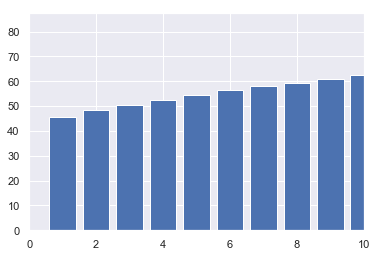

In [39]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print pca_x1
plt.bar( list(range(len(var1)+1))[1:], var1)
plt.xlim(0,10)
plt.savefig("cumulative_explained_variance_percent.png")

In [45]:
var

array([0.45680207, 0.02714638, 0.02134499, 0.02024066, 0.01914821,
       0.01881252, 0.01648537, 0.01495192, 0.01488693, 0.0141971 ,
       0.01364458, 0.0133177 , 0.01272931, 0.01243479, 0.0123693 ,
       0.01192808, 0.0116089 , 0.0109813 , 0.0106499 , 0.01058881,
       0.01016888, 0.00975463, 0.00952634, 0.00936191, 0.00917676,
       0.00898199, 0.00851024, 0.00818752, 0.00807882, 0.00785737])

In [ ]:
#eigenvalues = pca.explained_variance_

In [20]:

n_samples = x.shape[0]


In [21]:
X_centered = x - np.mean(x, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_

MemoryError: 

In [ ]:
!say "its Done! DOne! Done! Done!"

In [ ]:

with open
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

In [ ]:
!say "its Done! DOne! Done! Done!"

In [ ]:
var1

In [ ]:
var

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

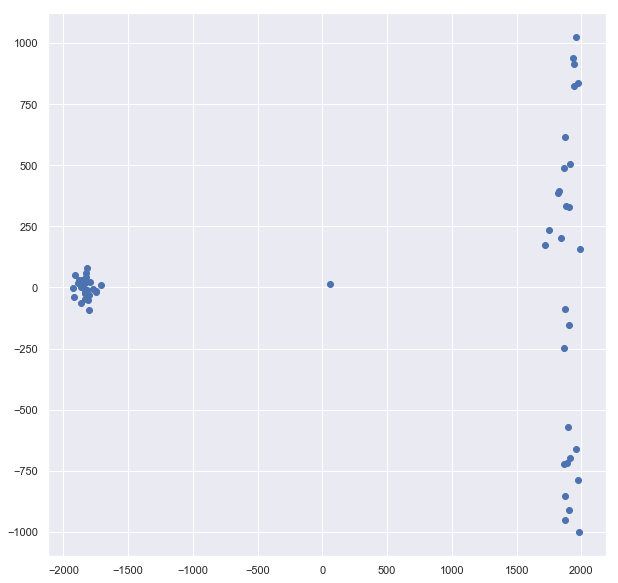

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(pca_x[:,0], pca_x[:,1])
plt.xlabel(s="PCA_1")
plt.ylabel(s="PCA_2")
for i, k in enumerate(pca_x):
    #if -50 >k[0]>200 or -100>k[1]>600:
        plt.text(x=k[0]-0.1, y=k[1], s=str(vcf.samples[i]))
        #print k[0], k[1] , str(vcf.samples[i])
#plt.ylim(-50, 200)
#plt.xlim(-100,600)
plt.show()

In [43]:
np.savetxt("pca_data2.tsv", pca_x1, fmt='%.18e', delimiter='\t', newline='\n')

In [ ]:
x = df3.iloc[:,0:-1].values
y = df3.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
imputer=Imputer(missing_values="NaN", strategy='mean', axis=0)
imputer = imputer.fit(x[:,:])
x[:, :]=imputer.transform(x[:, :])

In [ ]:
np.isnan(np.sum(x))

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=200)
pca_x = pca.fit_transform(x)

In [ ]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
plt.plot(var1)

makes sense for the test-dataset. as there is no population structure, the addition of more principle components
up to the amount of samples does introduce the same amount of explained variance

In [ ]:
pca = PCA(n_components=33)
pca.fit(x)
pca_x1=pca.fit_transform(x)

print pca_x1

In [ ]:
pca = PCA(n_components=2)
pca.fit(x)
pca_x1=pca.fit_transform(x)

#print pca_x1

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(pca_x1[:,0], pca_x1[:,1])
plt.xlabel(s="PCA_1")
plt.ylabel(s="PCA_2")
for i, txt in enumerate(y):
    plt.annotate(txt, (pca_x1[:,0],pca_x1[:,1]))
plt.show()

In [ ]:
with open("pca.txt", "r") as handle:
    pca_data =[i.rstrip() for i in handle.readlines()]

In [ ]:
pca_floats = [(float(i.split(" ")[0]),float(i.split(" ")[1])) for i in pca_data ]
pca_floats2 = [list(i) for i in zip(*pca_floats)]

In [ ]:
#pca_df

In [ ]:
a = t.get_header()
#print a[9:]
label = a[9:]
isinstance(label, list)

In [ ]:
isinstance(label[0], str)

In [ ]:
pca_df = pandas.DataFrame(pca_floats)

In [ ]:
pca_df.index = label
pca_df.columns = ["PCA_1", "PCA_2"]

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(pca_floats2[0], pca_floats2[1])
plt.xlabel(s="PCA_1")
plt.ylabel(s="PCA_2")
#for i, txt in enumerate(label):
#    plt.annotate(str(txt), xy=(pca_floats[0][i], pca_floats[1][i]))
plt.show()

In [ ]:
sns.set(style="white", color_codes=True)
#fig, ax = plt.subplots()
#plt.figure(figsize=(50,50))
sns.jointplot(x=pca_df["PCA_1"], y=pca_df["PCA_2"], color="m", marker="x", size=20);
#g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
#grid.plot_marginals(sns.rugplot, height=1, color="g")
#plt.xlabel(s="PCA_1")
#plt.ylabel(s="PCA_2")
#for i, txt in enumerate(label):
#    plt.annotate(str(txt), xy=(pca_floats[0][i], pca_floats[1][i]))
plt.show()

In [ ]:
sns.set(style="white", color_codes=True)

#fig, ax = plt.subplots()
#plt.figure(figsize=(50,50))
g = sns.JointGrid(x=pca_df["PCA_1"], y=pca_df["PCA_2"], size=30)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
#g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5", bins=50)
#g = sns.jointplot(x=pca_df["PCA_1"], y=pca_df["PCA_2"], color="g", kind="kde");
#g.plot_joint(plt.scatter, c="b", s=30, linewidth=1, marker="+")
#grid.plot_marginals(sns.rugplot, height=1, color="g")
#plt.xlabel(s="PCA_1")
#plt.ylabel(s="PCA_2")
#for i, txt in enumerate(label):
#    plt.annotate(str(txt), xy=(pca_floats[0][i], pca_floats[1][i]))
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')